In [2]:
from __future__ import division, print_function
import numpy as np
import pandas as pd
import astroquery
import matplotlib.pyplot as plt
import glob

import matplotlib
import seaborn.apionly as sns



%matplotlib inline


#matplotlib.style.use('ggplot')

#import seaborn as sns
#sns.set(palette="Set2")

#sns.set_context("paper")




In [6]:
DF_o = pd.read_csv('detected_DF.csv')

# mask out stars fainter than I = 13 and giants
mask = (DF_o.I <= 13.0) #& (DF_o.CL == 5)

In [7]:
DF = DF_o[mask]


(0.5, 15)

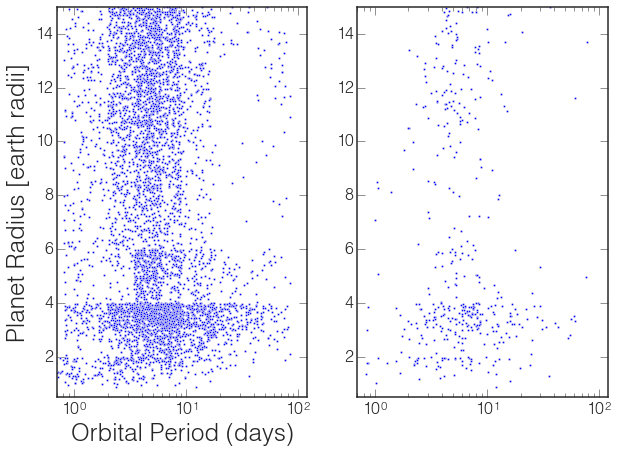

In [8]:
fig, [ax1a,ax1b] = plt.subplots(1, 2, figsize=[9,7], sharex=False, sharey=False)
ax1a.set_xscale('log')
#ax1a.set_yscale('log')
ax1a.scatter(DF.planetPeriod,DF.planetRadius,s=5)
ax1a.set_xlim([0.7,120])
ax1a.set_ylim([0.5,15])
ax1a.set_ylabel('Planet Radius [earth radii]')
ax1a.set_xlabel('Orbital Period (days)')

ax1b.set_xscale('log')
#ax1b.set_yscale('log')
ax1b.scatter(DF.planetPeriod[DF.I < 9],DF.planetRadius[DF.I < 9],s=5)
ax1b.set_xlim([0.7,120])
ax1b.set_ylim([0.5,15])

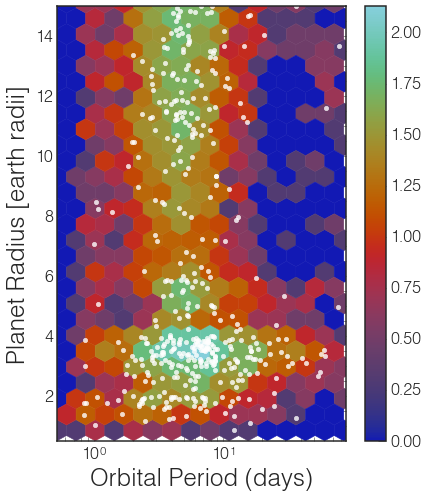

In [9]:
fig, ax1a = plt.subplots(1, 1, figsize=[6,7], sharex=False, sharey=False)
ax1a.set_xscale('log')
#ax1a.set_yscale('log')
hb = ax1a.hexbin(DF.planetPeriod,DF.planetRadius,gridsize=[15,20],xscale='log',
                 bins='log',vmin=0, 
                 marginals=False,cmap='bespoke_tom', )

ax1a.scatter(DF.planetPeriod[DF.I < 9],DF.planetRadius[DF.I < 9],s=20,alpha=0.8,color='w')

#ax1a.set_xlim([0.7,120])
ax1a.set_ylim([0.5,15])
ax1a.set_ylabel('Planet Radius [earth radii]')
ax1a.set_xlabel('Orbital Period (days)')




ax1a.minorticks_on()

fig.colorbar(hb,)

fig.tight_layout()

(0, 40)

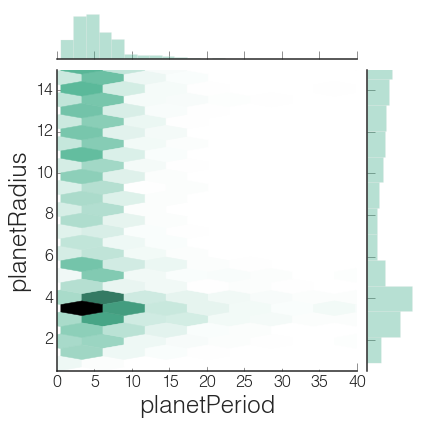

In [10]:
from scipy.stats import kendalltau

#fig, ax1a = plt.subplots(1, 1, figsize=[6,7], sharex=False, sharey=False)
#ax1a.set_xscale="log"
g = sns.jointplot(DF.planetPeriod,DF.planetRadius, kind="hex", color="#4CB391",ylim=[0.5,15],stat_func=None,
              xlim=[0.8,120],
              joint_kws={'xscale': 'linear',
                        'gridsize': [15,20],},
             )

g.ax_joint.set_xlim([0,40])

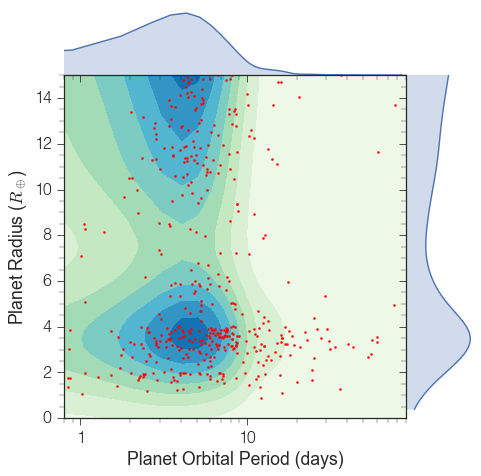

In [12]:
sns.set(style="white",context='paper', font_scale=2, 
        rc={'xtick.major.size': 7, 'xtick.minor.size': 5,
           'ytick.major.size': 7, 'ytick.minor.size': 5})
#f, ax = plt.subplots(figsize=(7, 7))
#ax.set(xscale="log", yscale="log")



g = sns.JointGrid("planetPeriod", "planetRadius", DF, space=0, xlim=[0.8,90], ylim=[0.0,15], 
                 size=7, )

g.ax_joint.set_xscale('log')
g.ax_marg_x.set_xscale('log')
#g.ax_joint.set_yscale('log')
#g.ax_marg_y.set_yscale('log')
g.plot_marginals(sns.kdeplot, shade=True, )
g.plot_joint(sns.kdeplot,shade=True, cmap="GnBu", n_levels=10, vmin=0, edgecolor="white")
#g.plot_joint(plt.scatter, x=DF.planetPeriod[DF.I < 9], y=DF.planetRadius[DF.I < 9])

#sns.jointplot(DF.planetPeriod[DF.I < 9],DF.planetRadius[DF.I < 9], kind='scatter')

g.ax_joint.scatter(DF.planetPeriod[DF.I < 9],DF.planetRadius[DF.I < 9], color='r',s=5)
#g.ax_joint.scatter(DF.planetPeriod,DF.planetRadius)

g.ax_joint.minorticks_on()

ax = plt.gca()

ax.set_ylabel('Planet Radius ($R_\oplus$)')
ax.set_xlabel('Planet Orbital Period (days)')

from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_formatter(ScalarFormatter())
    axis.set_major_formatter(FormatStrFormatter('%i'))

plt.savefig('occ_with_giants.png', dpi=300)

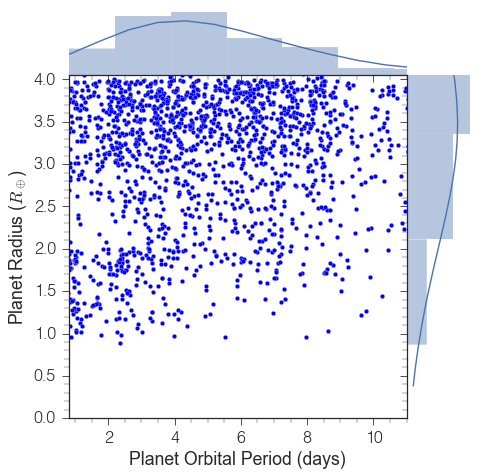

In [13]:
sns.set(style="white",context='paper', font_scale=2, 
        rc={'xtick.major.size': 7, 'xtick.minor.size': 5,
           'ytick.major.size': 7, 'ytick.minor.size': 5})
#f, ax = plt.subplots(figsize=(7, 7))
#ax.set(xscale="log", yscale="log")



g = sns.JointGrid("planetPeriod", "planetRadius", DF, space=0, xlim=[0.8,11], ylim=[0.0,4.05], 
                 size=7, )

#g.ax_joint.set_xscale('log')
#g.ax_marg_x.set_xscale('log')
#g.ax_joint.set_yscale('log')
#g.ax_marg_y.set_yscale('log')
g.plot_marginals(sns.distplot)#, shade=True, )
#g.plot_joint(sns.kdeplot,shade=True, cmap="GnBu", n_levels=100, vmin=0, edgecolor="white")
#g.plot_joint(plt.scatter, x=DF.planetPeriod[DF.I < 9], y=DF.planetRadius[DF.I < 9])

#sns.jointplot(DF.planetPeriod[DF.I < 9],DF.planetRadius[DF.I < 9], kind='scatter')

#g.ax_joint.scatter(DF.planetPeriod[DF.I < 9],DF.planetRadius[DF.I < 9], color='k',s=5)
g.ax_joint.scatter(DF.planetPeriod,DF.planetRadius)

g.ax_joint.minorticks_on()

ax = g.ax_joint

ax.set_ylabel('Planet Radius ($R_\oplus$)')
ax.set_xlabel('Planet Orbital Period (days)')

from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

ax.xaxis.set_major_formatter(ScalarFormatter())
ax.xaxis.set_major_formatter(FormatStrFormatter('%i'))
ax.yaxis.set_major_formatter(ScalarFormatter())
#ax.yaxis.set_major_formatter(FormatStrFormatter('%i'))   
    
    
    

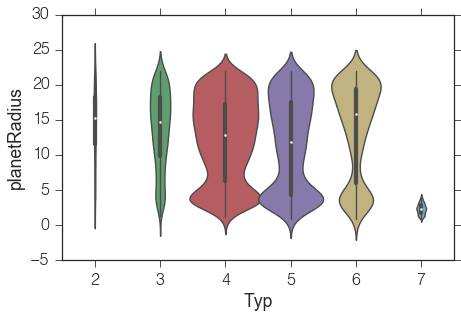

In [14]:
#sns.violinplot(DF.planetRadius,DF.Typ.astype(int),
#               names = ['B','A','F','G','K','M'], bw='0.3')
#plt.ylim([0,1000000])
#plt.xlabel('Spectral Type')
#plt.minorticks_on()


sns.violinplot(DF.Typ.astype(int),DF.planetRadius, order=[2,3,4,5,6,7], scale='count',
              names = ['B','A','F','G','K','M'], width=1.1, )


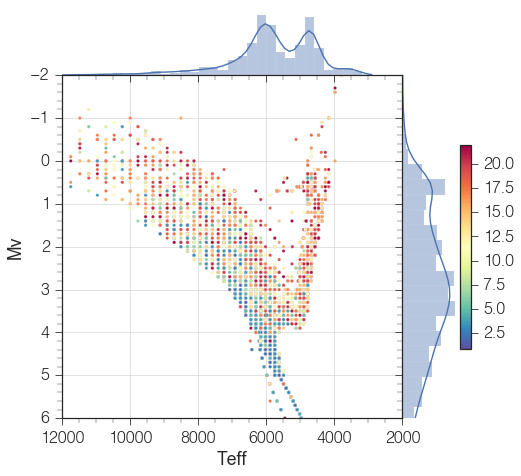

In [17]:
sns.set(style="white",context='paper', font_scale=2, 
        rc={'xtick.major.size': 7, 'xtick.minor.size': 5,
           'ytick.major.size': 7, 'ytick.minor.size': 5})
#f, ax = plt.subplots(figsize=(7, 7))
#ax.set(xscale="log", yscale="log")



g = sns.JointGrid("Teff", "Mv", DF, space=0, xlim=[12000,2000], ylim=[16,-2], 
                 size=7, )

#g.ax_joint.set_xscale('log')
#g.ax_marg_x.set_xscale('log')
#g.ax_joint.set_yscale('log')
#g.ax_marg_y.set_yscale('log')
g.plot_marginals(sns.distplot)#, shade=True, )
#g.plot_joint(sns.kdeplot,shade=True, cmap="GnBu", n_levels=100, vmin=0, edgecolor="white")
#g.plot_joint(plt.scatter, x=DF.planetPeriod[DF.I < 9], y=DF.planetRadius[DF.I < 9])

#sns.jointplot(DF.planetPeriod[DF.I < 9],DF.planetRadius[DF.I < 9], kind='scatter')

#g.ax_joint.scatter(DF.planetPeriod[DF.I < 9],DF.planetRadius[DF.I < 9], color='k',s=5)
scat = g.ax_joint.scatter(DF.Teff,DF.Mv,s=10,c=DF.planetRadius,cmap='Spectral_r')

g.ax_joint.minorticks_on()

ax = g.ax_joint

#ax.set_ylabel('Planet Radius ($R_\oplus$)')
#ax.set_xlabel('Planet Orbital Period (days)')

from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

#ax.xaxis.set_major_formatter(ScalarFormatter())
#ax.xaxis.set_major_formatter(FormatStrFormatter('%i'))
#ax.yaxis.set_major_formatter(ScalarFormatter())
#ax.yaxis.set_major_formatter(FormatStrFormatter('%i'))   
    
ax.grid()

fig = plt.gcf()
fig.colorbar(scat)


plt.savefig('occ_hr.png', dpi=300)

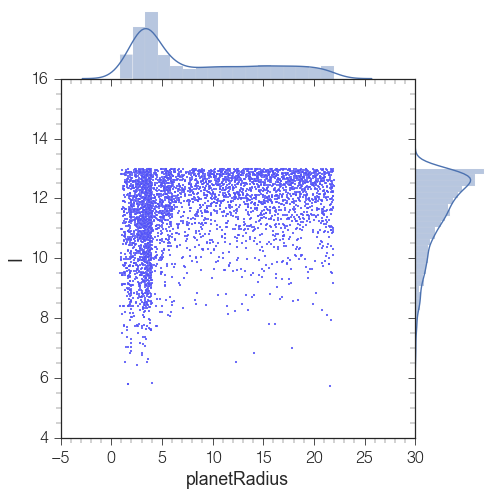

In [11]:
sns.set(style="white",context='paper', font_scale=2, 
        rc={'xtick.major.size': 7, 'xtick.minor.size': 5,
           'ytick.major.size': 7, 'ytick.minor.size': 5})
#f, ax = plt.subplots(figsize=(7, 7))
#ax.set(xscale="log", yscale="log")



g = sns.JointGrid("planetRadius", "I", DF, space=0, #xlim=[16000,0], ylim=[17,-4], 
                 size=7, )

#g.ax_joint.set_xscale('log')
#g.ax_marg_x.set_xscale('log')
#g.ax_joint.set_yscale('log')
#g.ax_marg_y.set_yscale('log')
g.plot_marginals(sns.distplot)#, shade=True, )
#g.plot_joint(sns.kdeplot,shade=True, cmap="GnBu", n_levels=100, vmin=0, edgecolor="white")
#g.plot_joint(plt.scatter, x=DF.planetPeriod[DF.I < 9], y=DF.planetRadius[DF.I < 9])

#sns.jointplot(DF.planetPeriod[DF.I < 9],DF.planetRadius[DF.I < 9], kind='scatter')

#g.ax_joint.scatter(DF.planetPeriod[DF.I < 9],DF.planetRadius[DF.I < 9], color='k',s=5)
g.ax_joint.scatter(DF.planetRadius,DF.I,s=4)

g.ax_joint.minorticks_on()

ax = g.ax_joint

#ax.set_ylabel('Planet Radius ($R_\oplus$)')
#ax.set_xlabel('Planet Orbital Period (days)')

from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

#ax.xaxis.set_major_formatter(ScalarFormatter())
#ax.xaxis.set_major_formatter(FormatStrFormatter('%i'))
#ax.yaxis.set_major_formatter(ScalarFormatter())
#ax.yaxis.set_major_formatter(FormatStrFormatter('%i'))   
    

    

(array([ 14.,  32.,  69.,  66.,  64.,  53.,  54.,  41.,  41.,  16.,   8.,
         13.,   8.,   5.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 14 Patch objects>)

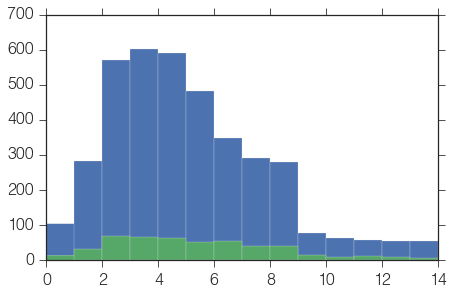

In [12]:
plt.hist(DF.planetPeriod, bins=np.arange(0,15,1))
plt.hist(DF.planetPeriod.values[DF.I.values < 10.0], bins=np.arange(0,15,1))

In [22]:
#DF

In [21]:
#DF[DF.Dist <= 0.03]

(array([ 17.,  13.,  16.,   9.,  12.,   9.,   7.,   4.,   8.,   5.]),
 array([  6.02326805,   7.52360472,   9.02394139,  10.52427806,
         12.02461473,  13.5249514 ,  15.02528807,  16.52562474,
         18.02596141,  19.52629807,  21.02663474]),
 <a list of 10 Patch objects>)

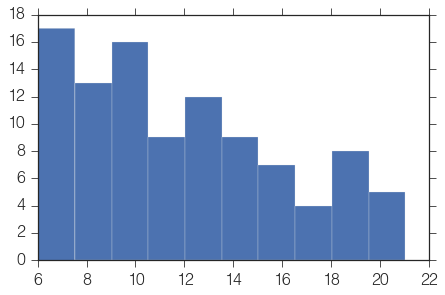

In [15]:
plt.hist(np.e**np.random.uniform(np.log(6),np.log(22),size=100))

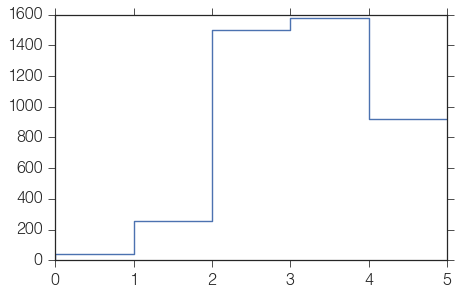

In [33]:
#plt.hist(DF.planetRadius, bins=[0,1.25,2,4,15], )
q = np.digitize(DF.planetRadius, bins=[0,1.25,2,4,15])
plt.step(np.arange(6),np.bincount(q),)


In [17]:
DF.columns

Index([u'Unnamed: 0', u'Dist', u'Mv', u'CL', u'Typ', u'LTef', u'logg', u'Age',
       u'Mass', u'BV', u'UB', u'VI', u'VK', u'V', u'FeH', u'l', u'b', u'Av',
       u'Mbol', u'isMdwarf', u'I', u'Teff', u'Radius', u'ra', u'dec',
       u'tess_ccd', u'obslen', u'cosi', u'noise_level', u'Nplanets',
       u'planetRadius', u'planetPeriod', u'starID', u'Ntransits', u'ars',
       u'ecc', u'omega', u'rprs', u'impact', u'duration',
       u'duration_correction', u'transit_depth', u'needed_for_detection',
       u'has_transits', u'detected'],
      dtype='object')